# UNIDAD 2 - PROYECTO: EDA + REGRESIÓN + PRUEBAS DE HIPÓTESIS 

## Nombre del estudiante: Samanta Gabriela Ortiz Garcia
## Número de control: 20120140

# ETAPA 1: Exploración de los datos.

## Paso 1: Cargue el dataset ("Retrasos.csv") en un dataframe, muestre información básica, enliste las columnas numéricas y las columnas objeto.

In [6]:
import pandas as pd
df = pd.DataFrame()
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as amano
import numpy as np

In [7]:
df = pd.read_csv('Retrasos.csv', delimiter=',') 
print(df)
print(df.info())

        id       country managed_by  fulfill_via vendor_inco_term  \
0    36203       Nigeria   PMO - US  Direct Drop              EXW   
1    30998      Botswana   PMO - US  Direct Drop              EXW   
2    69871       Vietnam   PMO - US  Direct Drop              EXW   
3    17648  South Africa   PMO - US  Direct Drop              DDP   
4     5647        Uganda   PMO - US  Direct Drop              EXW   
..     ...           ...        ...          ...              ...   
995  13608        Uganda   PMO - US  Direct Drop              DDP   
996  80394    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675        Zambia   PMO - US  Direct Drop              EXW   
998  39182  South Africa   PMO - US  Direct Drop              DDP   
999   5645      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air              1  Yes          HRDT              HIV test   
1             Air

## Paso 2: Haga conteo de datos nulos (ordene de forma descendente); de las variables numéricas, muestre datos estadísticos; de las variables de tipo objeto, determine cuáles sí son factibles para convertir en categóricas y el porqué.

In [5]:
# 1. Conteo de datos nulos (orden descendente)
null_counts = df.isnull().sum().sort_values(ascending=False)

# 2. variables numéricas
numeric_data = df.select_dtypes(include=['int', 'float'])
numeric_stats = numeric_data.describe()

# 3. Conversión de variables de tipo objeto a categóricas
categorical_variables = []
for col in df.select_dtypes(include=['object']):
    unique_values = len(df[col].unique())
    total_values = len(df[col])
    if unique_values / total_values < 0.5:
        # Si la proporción de valores únicos es menor al 50%, se considera factible para convertir en categórica.
        categorical_variables.append(col)


print("Conteo de datos nulos (orden descendente):")
print(null_counts)
print("\nDatos estadísticos de variables numéricas:")
print(numeric_stats)
print("\nVariables factibles para convertir en categóricas:")
print(categorical_variables)

Conteo de datos nulos (orden descendente):
unit_cost                   983
dosage                      409
line_item_insurance_usd      34
freight_cost_groups          14
freight_cost_usd             14
fulfill_via                   0
unit_of_measure_per_pack      0
weight_kilograms              0
first_line_designation        0
manufacturing_site            0
managed_by                    0
unit_price                    0
pack_price                    0
line_item_value               0
line_item_quantity            0
dosage_form                   0
vendor_inco_term              0
country                       0
brand                         0
molecule_test_type            0
item_description              0
vendor                        0
sub_classification            0
product_group                 0
late                          0
late_delivery                 0
shipment_mode                 0
id                            0
dtype: int64

Datos estadísticos de variables numéricas:
    

## Paso 3: Identifique si las columnas numéricas cuentan con anomalías, para ello puede apoyarse de gráficos; identifique si las columnas objeto tienen inconsistencias, para ello puede apoyarse de gráficos.

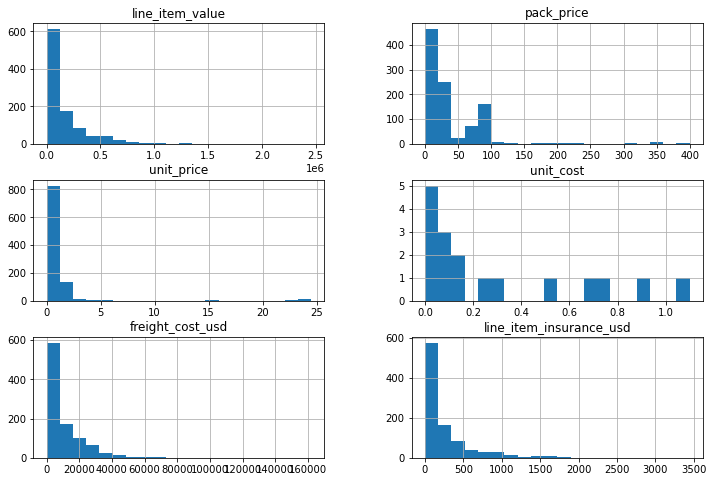

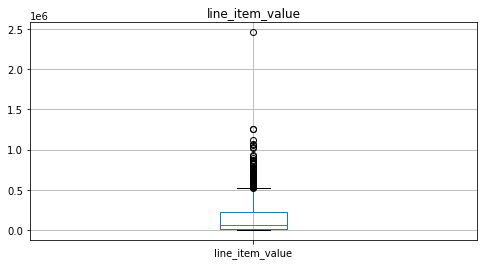

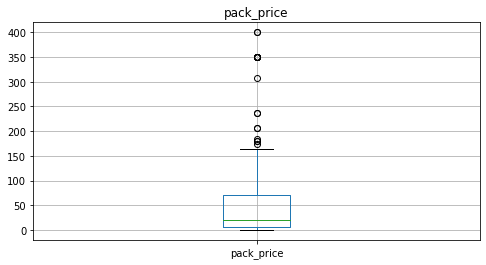

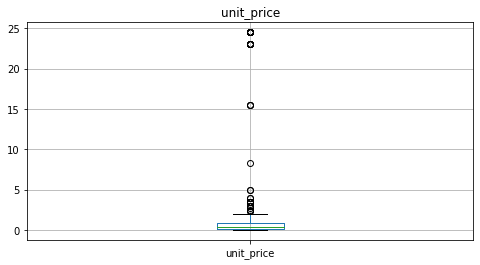

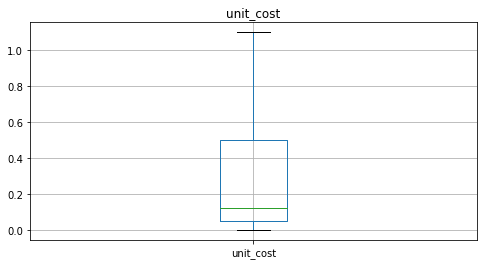

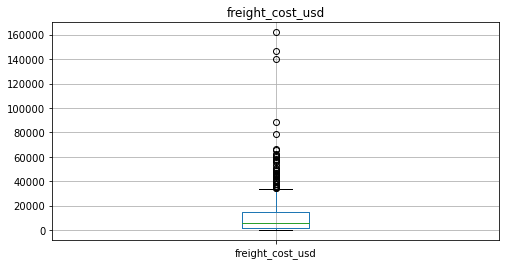

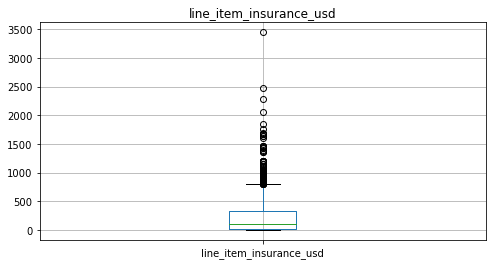

OBJETO


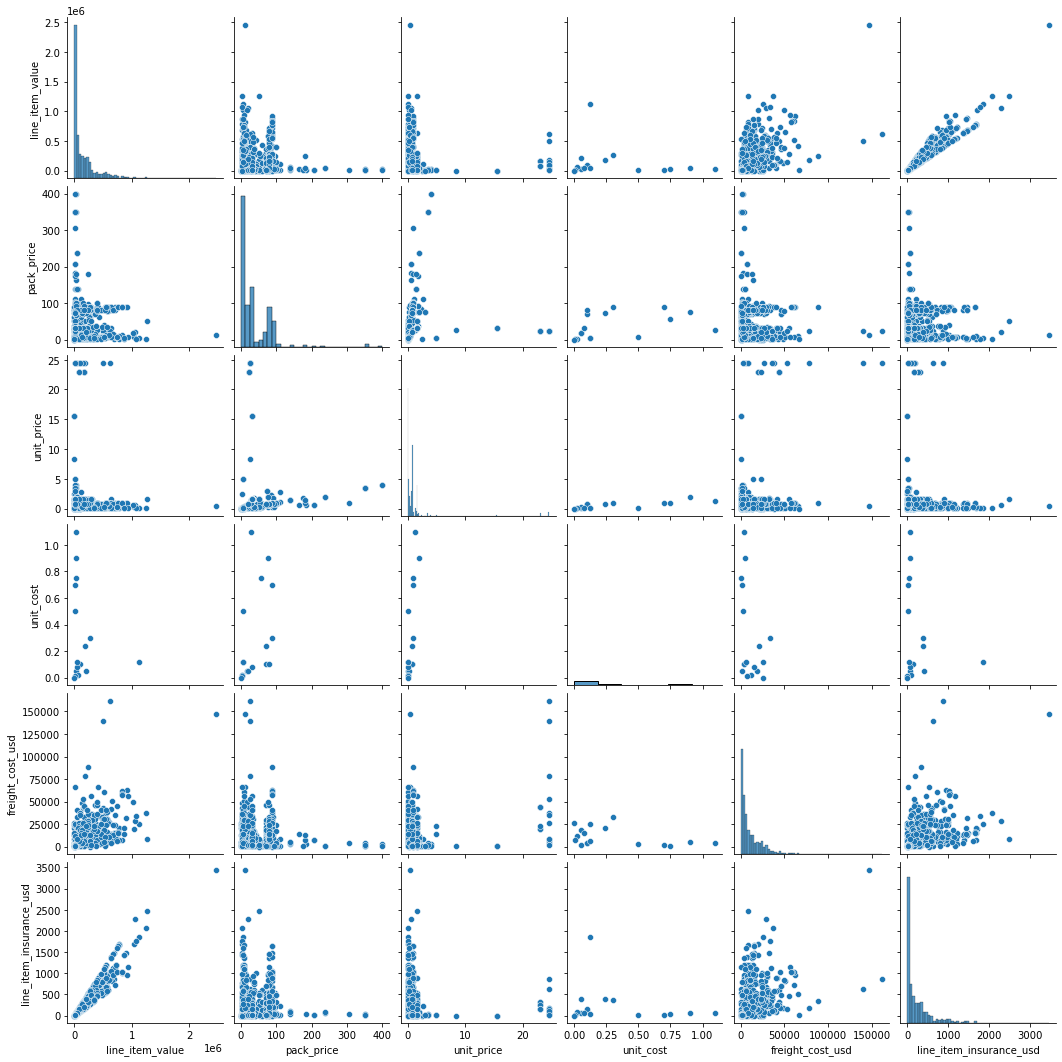

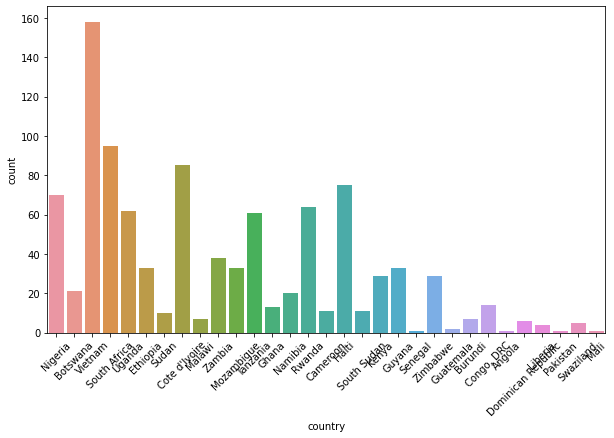

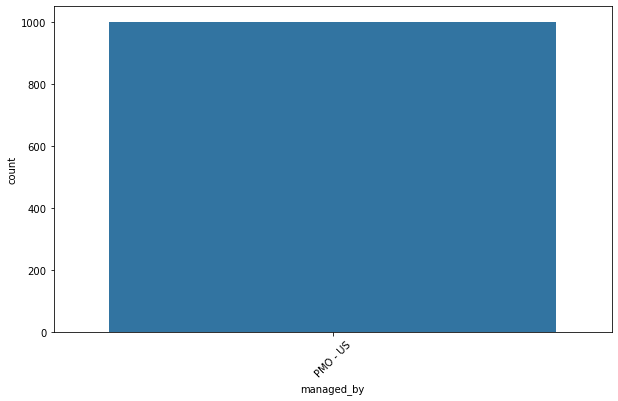

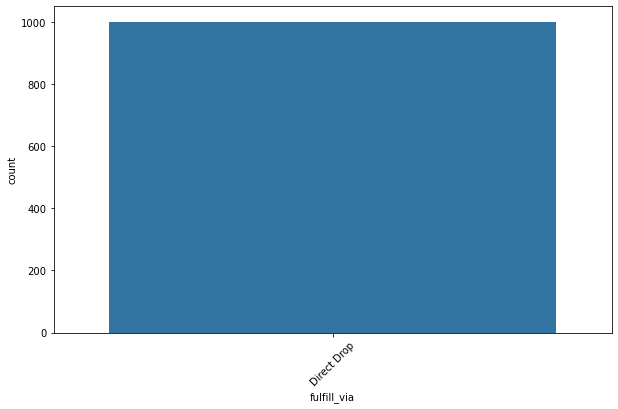

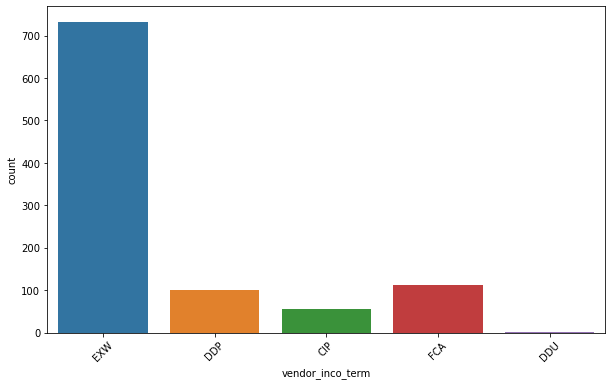

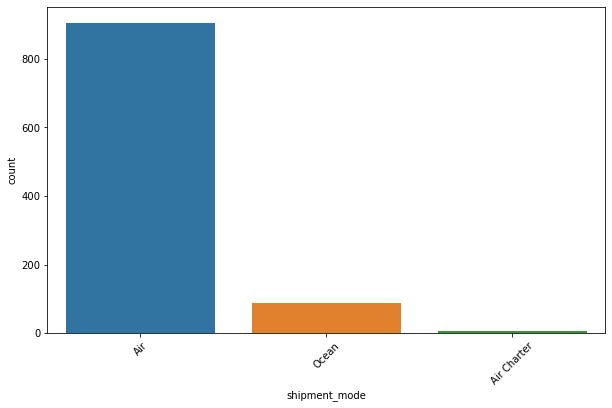

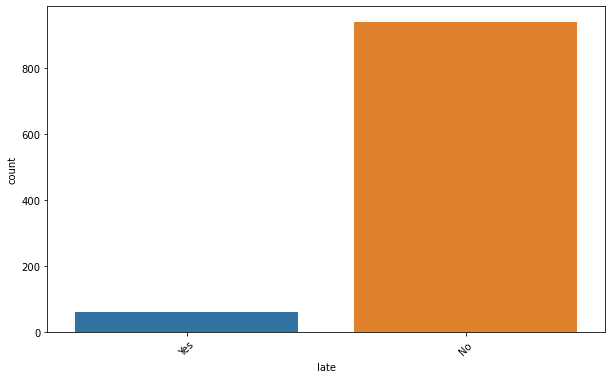

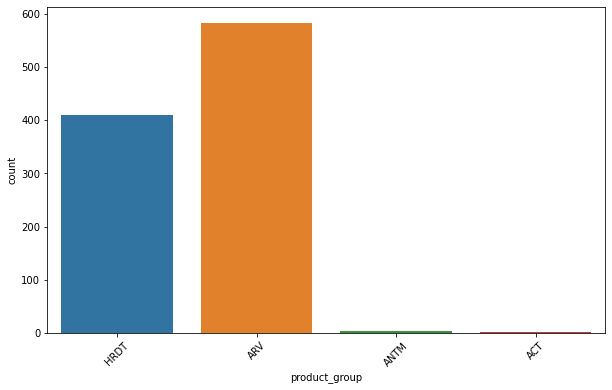

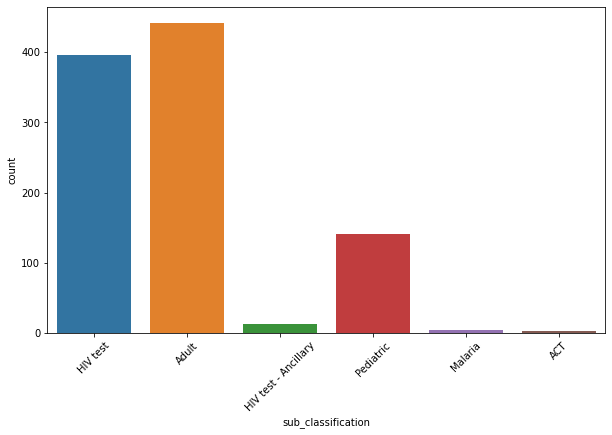

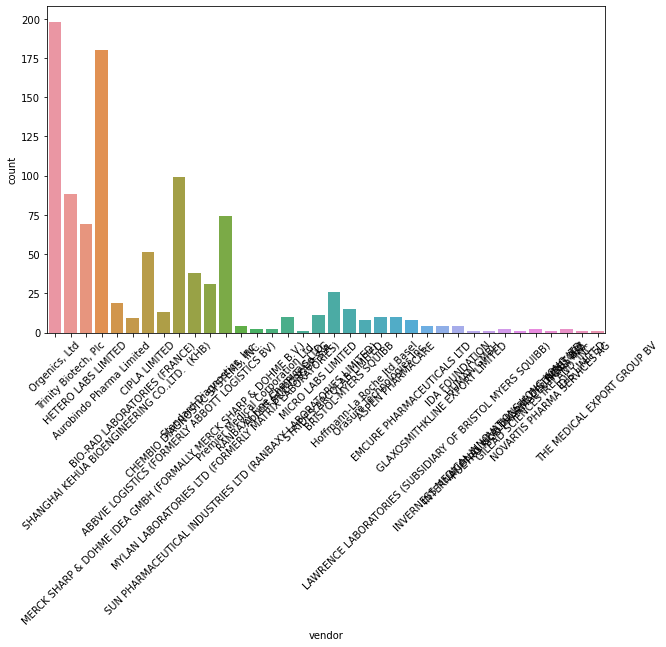

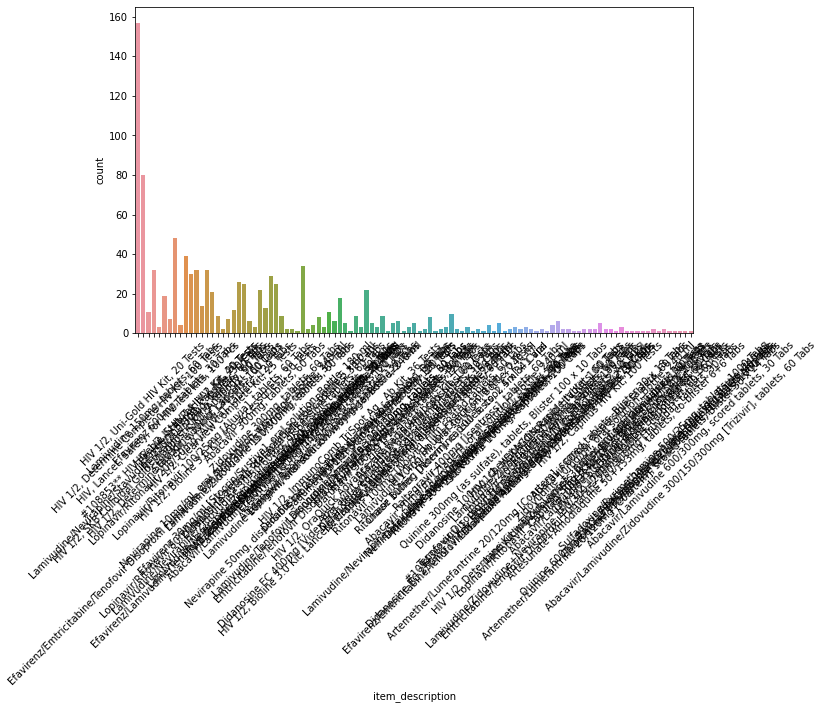

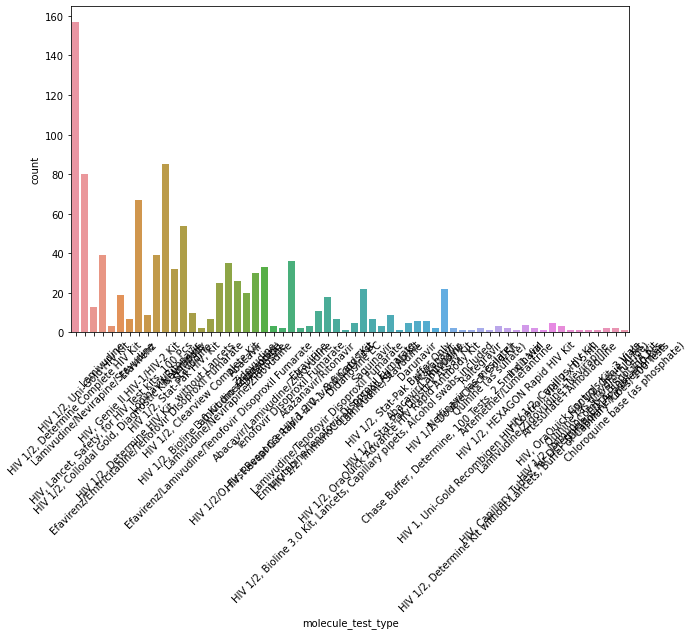

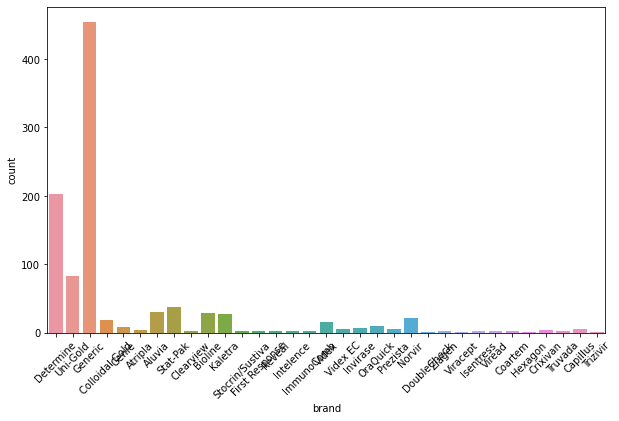

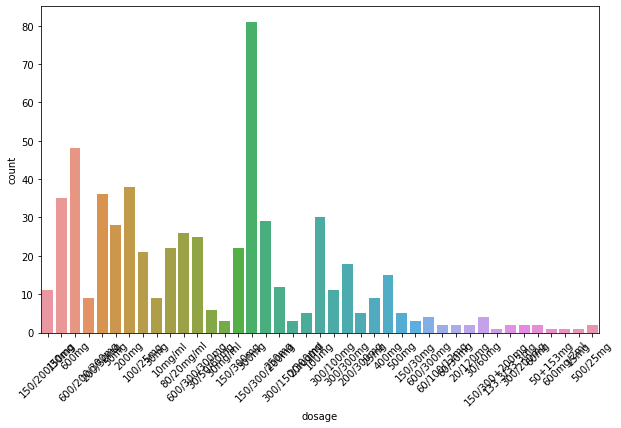

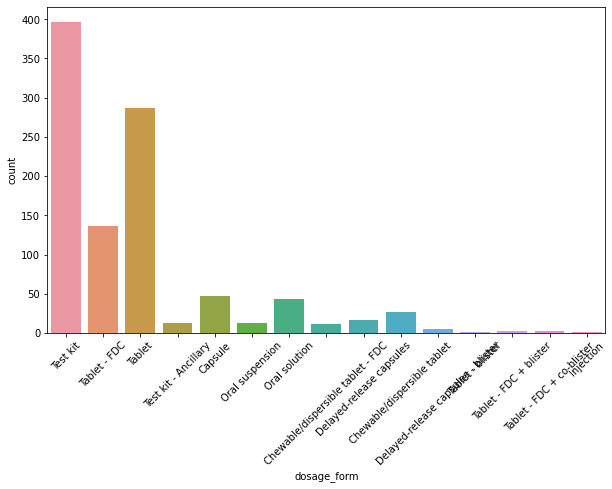

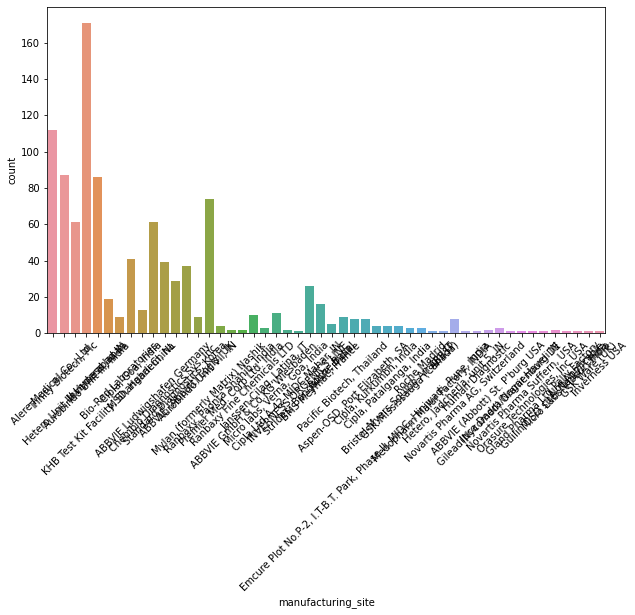

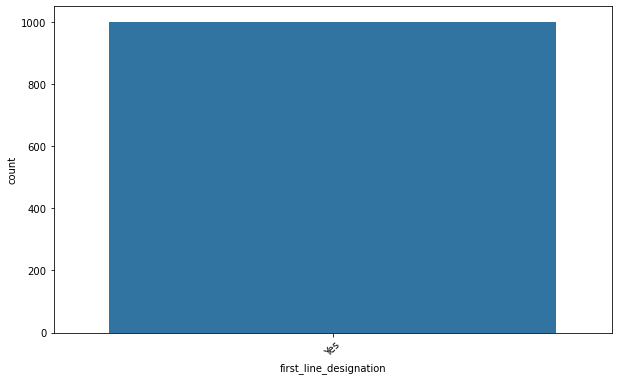

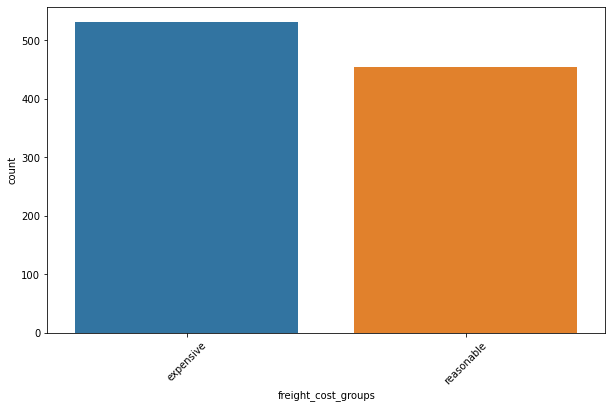

In [19]:
numeric_data = df.select_dtypes(include=['int', 'float'])
numeric_data.hist(bins=20, figsize=(12, 8))
plt.show()

for col in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=col)
    plt.title(col)
    plt.show()
#objeto
print("OBJETO")
sns.pairplot(df, vars=numeric_data.columns)
plt.show()


for col in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()
    
    

## Paso 4: Muestre las correlaciones (pearson y spearman) que hay en general (valores numéricos), puede utilizar gráficos, ¿cambian mucho los valores entre cada tipo de coeficiente de correlación?

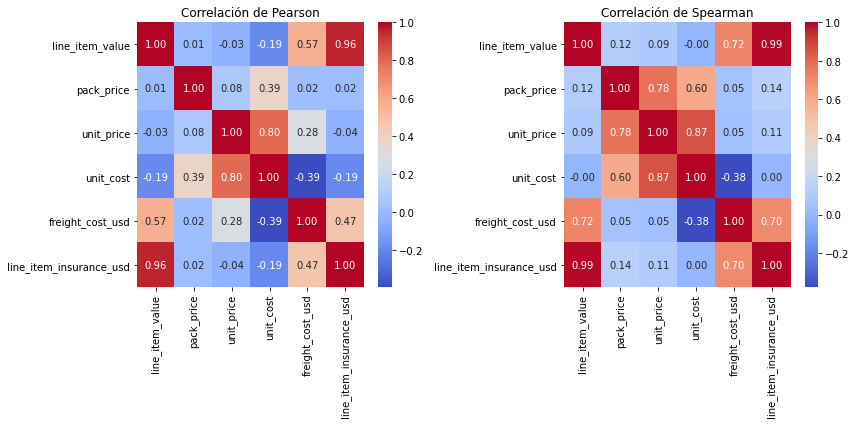

In [20]:
numeric_data = df.select_dtypes(include=['int', 'float'])
corr_pearson = numeric_data.corr()


corr_spearman = numeric_data.corr(method='spearman')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlación de Pearson")


sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlación de Spearman")

plt.tight_layout()
plt.show()

#¿cambian mucho los valores entre cada tipo de coeficiente de correlación?
#R=En algunos el cambio si es demasiado pero hay algunos en donde no hay cambio alguno y otros en donde es un cambio muy minimo

## Paso 5: Muestre los gráficos de distribución de las columnas, elija el tipo de gráfico adecuado para el tipo de variable que está analizando.

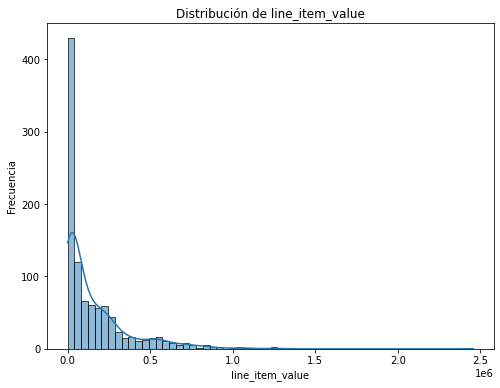

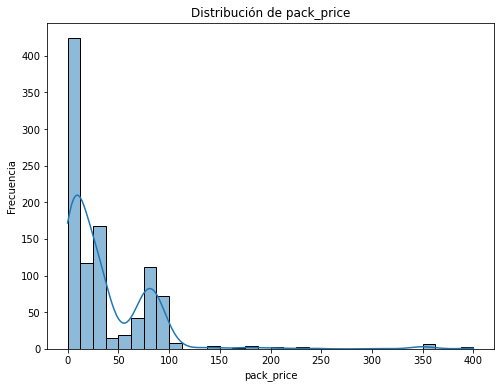

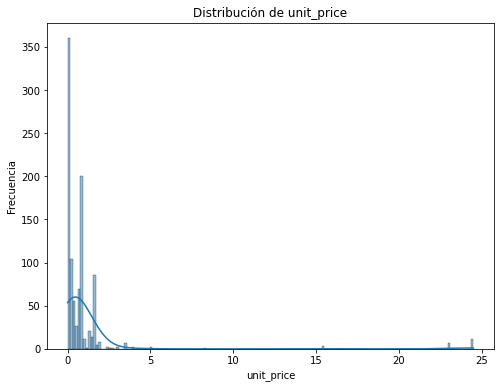

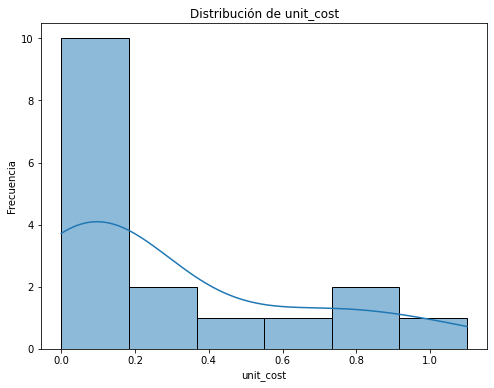

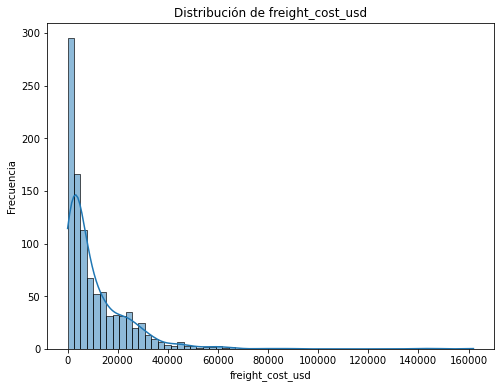

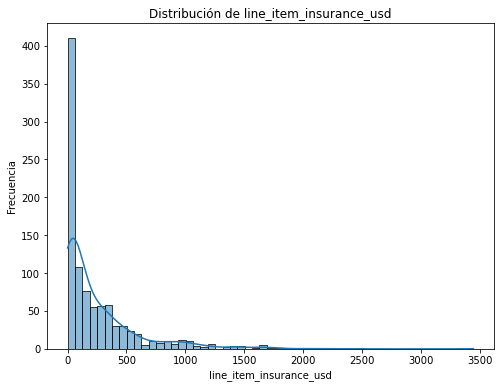

In [29]:
for col in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
    

# ETAPA 2: Manipulación y tratamiento de los datos.

## Paso 1: Trate los datos nulos, emplee las técnicas que considere más adecuadas de acuerdo al caso específico. Justifique el porqué de la técnicas que escogió.

In [30]:
#Esta técnica se utiliza cuando la presencia de datos nulos en ciertas filas o columnas no es crítica y
#no se pueden imputar con precisión. Es adecuada cuando la cantidad de datos nulos es pequeña y no afecta 
#significativamente el análisis.

# Eliminación de filas con datos nulos
df = df.dropna()

# Eliminación de columnas con datos nulos
df = df.dropna(axis=1)

## Paso 2: Convierta en categorías las variables objeto que considere adecuadas, en caso de ser necesario, trate las inconsistencias.

In [67]:
categorical_variables = []
for col in df.select_dtypes(include=['object']):
    unique_values = len(df[col].unique())
    total_values = len(df[col])
    if unique_values / total_values < 0.5:
        
        categorical_variables.append(col)



df[categorical_variables] = df[categorical_variables].astype('category')


## Paso 3: Utilice el coeficiente de variación para determinar qué columnas (variables) numéricas tienen mayor dispersión.

In [46]:
numeric_data = df.select_dtypes(include=['int', 'float'])


def coeficiente_de_variacion(columna):
    media = columna.mean()
    desviacion_estandar = columna.std()
    return (desviacion_estandar / media) * 100


coeficientes_de_variacion = numeric_data.apply(coeficiente_de_variacion)

coeficientes_de_variacion = coeficientes_de_variacion.sort_values(ascending=False)

print(coeficientes_de_variacion)


line_item_insurance_usd    213.051135
line_item_value            210.307749
unit_cost                  136.660359
unit_price                 133.673037
pack_price                 113.043460
freight_cost_usd            85.170870
dtype: float64


## Paso 4: De las variables con mayor dispersión, presente su distribución, su gráfico boxplot, y describa a qué se debe que haya tanta dispersión.

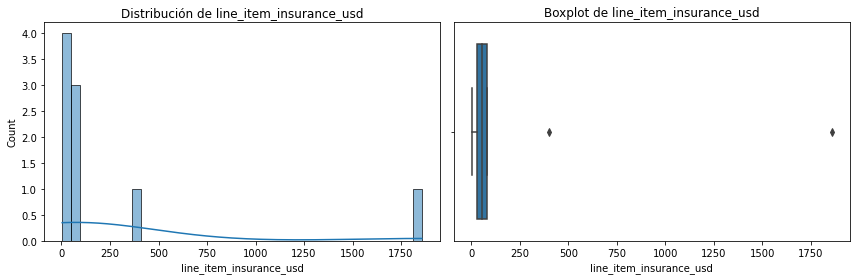

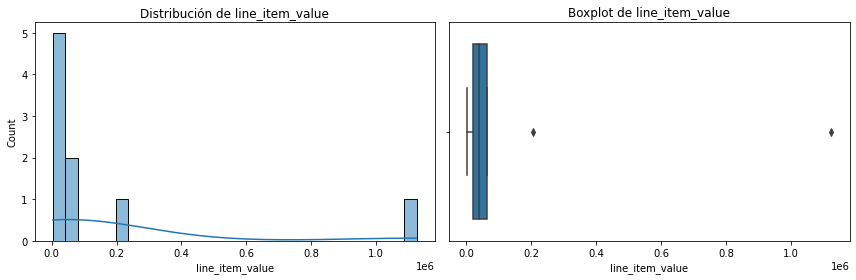

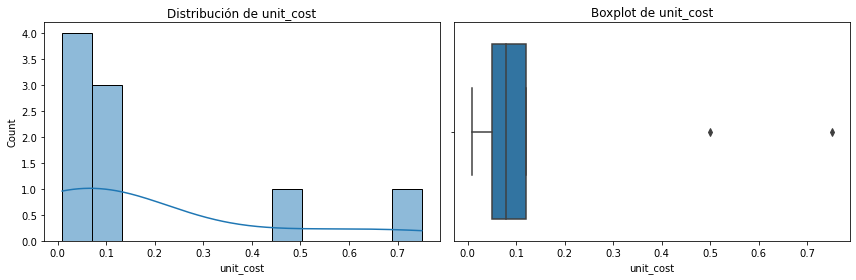

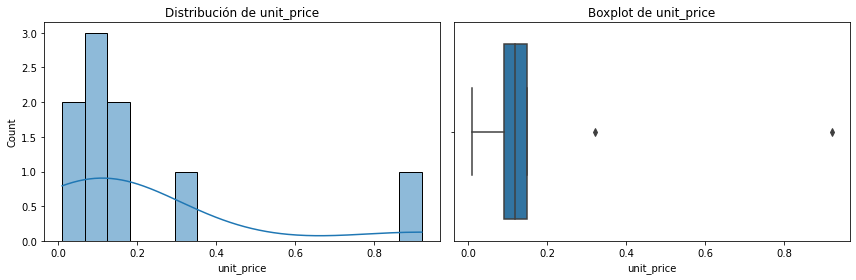

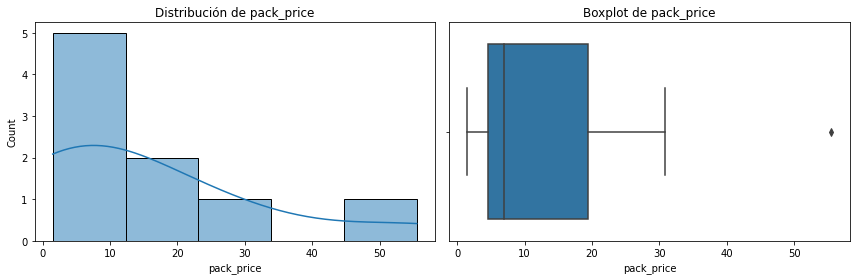

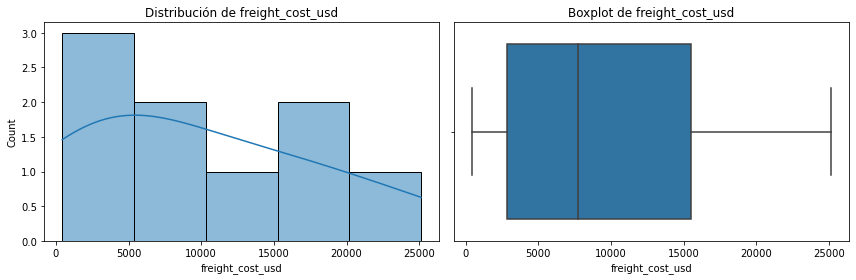

In [48]:
variables_mayor_dispersión = coeficientes_de_variacion.head(6).index


for variable in variables_mayor_dispersión:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución de {variable}')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=variable, data=df)
    plt.title(f'Boxplot de {variable}')

    plt.tight_layout()
    plt.show()
#puede ser por valores atipicos o errores en la medicion

## Paso 5: Conteste las siguientes preguntas acorde a la información obtenida de los datos.
#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "line_item_insurance_usd"?
#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "late_delivery"?
#### ¿Cree que alguna otra columna (objeto o categórica) se pueda correlacionar fuertemente con "late_delivery"?, si es así, ¿cuál o cuáles cree que tendrían una correlación fuerte?

# ETAPA 3: Construcción de un modelo de regresión lineal.

## Paso 1: Seleccionar las columnas que estén más correlacionadas con "line_item_insurance_usd" y asígnelas en la variable "X", seleccione la columna "line_item_insurance_usd" y asignela a la variable "y".

In [50]:
correlation_matrix = df.corr()
num_top_features = 3 
top_correlated_features = correlation_matrix.nlargest(num_top_features, "line_item_insurance_usd")["line_item_insurance_usd"].index

X = df[top_correlated_features]

y = df["line_item_insurance_usd"]


## Paso 2: Divida en dos muestras los dos dataframes creados anteriormente (X,y), debe tener una muestra para entrenamiento y otra para pruebas, el tamaño de la muestra de entrenamiento debe ser del 80%, asigne una semilla aleatoria con valor de 2033 para poder brindar reproducibilidad.

In [65]:
from sklearn.model_selection import train_test_split


semilla_aleatoria = 2033

X_train, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=semilla_aleatoria)
print(f'Tamaño del conjunto de entrenamiento: {len(X_train)} muestras')
print(f'Tamaño del conjunto de prueba: {len(X_prueba)} muestras')


Tamaño del conjunto de entrenamiento: 7 muestras
Tamaño del conjunto de prueba: 2 muestras


## Paso 3: Importe el modelo de regresión lineal (multivariable) de sklearn, entrene el modelo con el set de datos de entrenamiento, posteriormente haga predicciones con el set de pruebas (X_train).

In [66]:
from sklearn.linear_model import LinearRegression


modelo_regresion = LinearRegression()


modelo_regresion.fit(X_entrenamiento, y_entrenamiento)

predicciones = modelo_regresion.predict(X_train)

print(predicciones)


[1856.65   30.35   64.81    3.55   41.55  402.36   78.14]


## Paso 4: Evalúe el modelo con la métrica "accuracy_score" y la métrica "f1_score" (ambas disponibles con sklearn).

In [61]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_prueba, predicciones)


r2 = r2_score(y_prueba, predicciones)

print(f'MSE: {mse}')
print(f'R2: {r2}')


MSE: 1.840250302078507e-21
R2: 1.0


## Paso 5: Responda.
#### ¿Su modelo fue capaz de realizar predicciones con precisión?
Para que un modelo sea preciso MSE debe ser menor o cerca de 0, considero que 1.8 es algo alejado de 0, sin embargo
R2 muestra un mejor rendimiento ya que cercano a 1 lo indica
#### ¿A qué cree que se deba el rendimiento de su modelo?
A que MSE y R2 cumplan con los valores que demuestren buen rendimiento
#### Si selecciona todas las variables y las asigna en X, en lugar de las que tienen correlación más fuerte, ¿cree que el modelo mejore o empeore?
creo que puede empeorar, ya que no todas las variables estan correlacionadas y puede alterar el resultado del modelo

# ETAPA 4: Hipótesis.

## Paso 1: Defina la hipótesis nula a partir de la siguiente pregunta:
#### ¿La proporción de entrega tarde ("late_delivery") es mayor a 0.06 (6%)?, asigne el valor de la hipótesis nula a la variable "Ho".
#### Considere un nivel de significación del 5%.

In [54]:
#Hipótesis Nula (Ho): La proporción de entregas tardías es igual o menor al 6% (0.06).

#Esta hipótesis nula establece que la proporción de entregas tardías no es mayor al 6%. 
#Durante la prueba de hipótesis, comprobaremos si hay suficiente evidencia para rechazar esta afirmación
#en favor de la hipótesis alternativa, 
#que sugiere que la proporción de entregas tardías es mayor al 6%.
#El nivel de significación del 5% implica que estamos dispuestos a aceptar un riesgo de cometer un error
#tipo I del 5%. En otras palabras, estamos dispuestos a rechazar la hipótesis nula si encontramos suficiente
#evidencia en nuestros datos que sugiera que la proporción de entregas tardías es significativamente mayor al 6%,
#pero no estamos dispuestos a hacerlo si no tenemos suficiente evidencia.

## Paso 2: Defina la hipótesis alternativa según la pregunta anterior, solo escríba cómo quedaría y qué tipo de prueba de hipótesis se utilizará.

Su respuesta:Hipótesis Alternativa (Ha): La proporción de entregas tardías es mayor al 6% (0.06).

la hipótesis alternativa sugiere que la proporción de entregas tardías es significativamente mayor que el 6%. 

El tipo de prueba de hipótesis que se utilizaría en este caso es una "prueba de cola derecha" o una "prueba de una muestra". Estamos interesados en determinar si la proporción es mayor que un valor específico (0.06) y no estamos preocupados por si es menor. La prueba de hipótesis adecuada dependerá de los datos, pero en términos generales, sería una prueba de proporción Z o t para comparar la proporción observada con el valor de referencia (0.06) bajo la hipótesis nula.

## Paso 3: Haga una distribución bootstrap de la columna "late_delivery" y calcule el error estándar, guárdelo en una variable. El tamaño de la lista de la distribución de boostrap queda a libre elección, muestre un histograma de la distribución bootstrap.

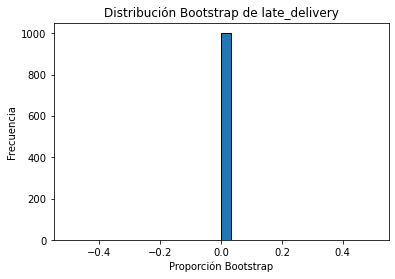

Error Estándar Bootstrap: 0.0


In [55]:
columna_late_delivery = df['late_delivery']


num_bootstrap_samples = 1000 

proporciones_bootstrap = []


for _ in range(num_bootstrap_samples):
    muestra_bootstrap = np.random.choice(columna_late_delivery, size=len(columna_late_delivery), replace=True)
    proporcion_bootstrap = np.mean(muestra_bootstrap)
    proporciones_bootstrap.append(proporcion_bootstrap)


error_estandar_bootstrap = np.std(proporciones_bootstrap)


plt.hist(proporciones_bootstrap, bins=30, edgecolor='k')
plt.xlabel('Proporción Bootstrap')
plt.ylabel('Frecuencia')
plt.title('Distribución Bootstrap de late_delivery')
plt.show()


print(f'Error Estándar Bootstrap: {error_estandar_bootstrap}')


## Paso 4: Calcule la puntuación Z y guárdela en una variable.

In [57]:

proporcion_observada = 1000


z_score = (proporcion_observada - np.mean(proporciones_bootstrap)) / error_estandar_bootstrap


print(f'Z-Score: {z_score}')


Z-Score: inf


<ipython-input-57-8c5e4e75a698>:4: RuntimeWarning: divide by zero encountered in double_scalars
  z_score = (proporcion_observada - np.mean(proporciones_bootstrap)) / error_estandar_bootstrap


## Paso 5: Dependiendo del tipo de prueba, calcule el valor de P (p-value) y diga si puede rechazar (o falla al rechazar) la hipótesis nula.
## Calcule el intervalo de confianza, utilice los cuantiles adecuados dado el nivel de significación establecido previamente.

In [60]:
from scipy.stats import norm

alfa = 0.05 


valor_p = 1 - norm.cdf(z_score)


if valor_p < alfa:
    print(f'Valor p = {valor_p}, se rechaza la hipótesis nula (Ho)')
else:
    print(f'Valor p = {valor_p}, no se rechaza la hipótesis nula (Ho)')
    
    
alfa = 0.05

proporciones_bootstrap_ordenadas = np.sort(proporciones_bootstrap)


percentil_inferior = np.percentile(proporciones_bootstrap_ordenadas, alfa/2 * 100)
percentil_superior = np.percentile(proporciones_bootstrap_ordenadas, (1 - alfa/2) * 100)


print(f'Intervalo de Confianza ({1-alfa} de confianza) para late_delivery: ({percentil_inferior}, {percentil_superior})')



Valor p = 0.0, se rechaza la hipótesis nula (Ho)
Intervalo de Confianza (0.95 de confianza) para late_delivery: (0.0, 0.0)


# ETAPA 5: Publicando el notebook.

## Paso 1: Al igual que con el proyecto anterior, haga un repositorio público en su cuenta de GitHub.

## Paso 2: Suba este archivo jupyter-notebook junto con el archivo de instrucciones y el set de datos.

## Paso 3: Documente apropiadamente el proyecto en el repositorio público, haga uso del archivo "README" que suele crearse.

## Paso 4: Copie el enlace al repositorio y mándelo al entregar la actividad. 
# IMPORTANTE: Al entregar este proyecto, debe entregar este archivo y el enlace a la copia que estará en GitHub, se necesitan de ambas cosas.